In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [158]:
data = pd.read_csv("C:\\Users\\wajit\\Downloads\\2017-2022.csv")

In [159]:
data.describe()

,Latitude,Longitude,Kedalaman (km),Magnitude
count,6149.000000,6149.000000,6149.000000,6149.000000
mean,-8.879588,111.311699,30.002895,3.142739
std,0.838015,1.396364,51.434214,0.670986
min,-12.690000,108.200000,1.000000,0.900000
25%,-9.300000,110.370000,10.000000,2.800000
50%,-8.881300,111.070000,14.000000,3.100000
75%,-8.430000,112.720000,29.000000,3.500000
max,0.767800,114.000000,715.000000,6.600000


In [160]:
tanggal = data["Tanggal"]
latitude = data["Latitude"]
longitude = data["Longitude"]
kedalaman = data["Kedalaman (km)"]
magnitude = data["Magnitude"]

In [161]:
gempa_semua = []
for index in range(len(latitude)):
  gempa = []
  gempa.append(latitude[index])
  gempa.append(longitude[index])
  gempa.append(kedalaman[index])

  gempa_semua.append(gempa)

In [162]:
gempa_semua = np.array(gempa_semua)

In [163]:
print(gempa_semua)

[[ -8.93   110.05    10.    ]
 [ -9.28   113.87    10.    ]
 [ -9.04   112.87    10.    ]
 ...
 [ -8.8896 112.4811  41.    ]
 [-10.4633 113.1895  10.    ]
 [ -8.8052 109.5594  29.    ]]


In [164]:
magnitude = magnitude.astype('float64')

In [165]:
magnitude.dtype

dtype('float64')

In [166]:
X_train, X_test, y_train, y_test = train_test_split(gempa_semua, magnitude, test_size=0.3, random_state=42)

In [167]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,),  kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                256       
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 32)                4128      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 2)                

In [168]:
optimizer = Adam(learning_rate=0.000001)

In [169]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [170]:
history = model.fit(X_train, y_train, batch_size=64, epochs=3000, verbose=1, validation_data=(X_test, y_test))

Epoch 1/3000
68/68 [==============================] - 1s 4ms/step - loss: 24.1045 - mean_absolute_error: 4.6554 - val_loss: 23.8610 - val_mean_absolute_error: 4.7380
Epoch 2/3000
68/68 [==============================] - 0s 2ms/step - loss: 23.3307 - mean_absolute_error: 4.5732 - val_loss: 23.3356 - val_mean_absolute_error: 4.6846
Epoch 3/3000
68/68 [==============================] - 0s 2ms/step - loss: 22.8849 - mean_absolute_error: 4.5405 - val_loss: 22.8231 - val_mean_absolute_error: 4.6319
Epoch 4/3000
68/68 [==============================] - 0s 2ms/step - loss: 22.3727 - mean_absolute_error: 4.4869 - val_loss: 22.3156 - val_mean_absolute_error: 4.5790
Epoch 5/3000
68/68 [==============================] - 0s 3ms/step - loss: 21.8260 - mean_absolute_error: 4.4351 - val_loss: 21.8234 - val_mean_absolute_error: 4.5271
Epoch 6/3000
68/68 [==============================] - 0s 2ms/step - loss: 21.4323 - mean_absolute_error: 4.3837 - val_loss: 21.3326 - val_mean_absolute_error: 4.4748
Epoc

In [171]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy: ", accuracy)

58/58 [==============================] - 0s 829us/step - loss: 0.8697 - mean_absolute_error: 0.7586
Accuracy:  0.758597195148468


In [172]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('hasil_pelatihan.csv', index=False)

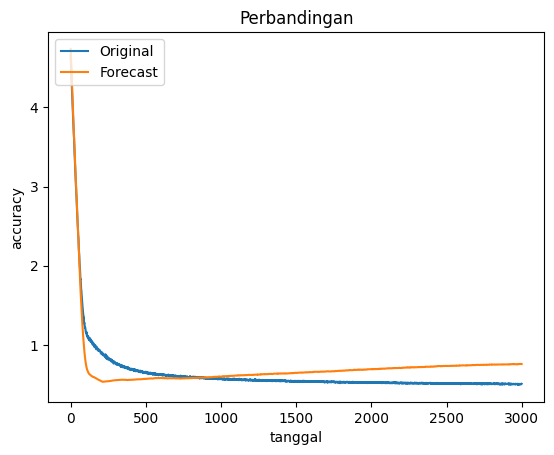

In [173]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Perbandingan')
plt.ylabel('accuracy')
plt.xlabel('tanggal')
plt.legend(['Original', 'Forecast'], loc='upper left')
plt.show()

In [174]:
#koordinat_latitude = float(input("Masukkan koordinat latitude anda : "))
#koordinat_longitude = float(input("Masukkan koordinat longitude anda: "))
#kedalaman_gempa = float(input("Masukkan Kedalaman Gempa dalam (Km): "))

In [175]:
#prediksi_gempa = model.predict([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
#print("Perkiraan kekuatan gempa {[0][0]} Mg".format(prediksi_gempa))